# Predicting osu!mania beatmap difficulties



In [11]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # library for numerical calculations
import pandas as pd # library for reading csv files

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

## Building the models

In [13]:
from sklearn.linear_model import LinearRegression
def run_linear_regression(X_train,X_test,y_train,y_test):
    
    # define a new scaler: 
    x_scaler = MinMaxScaler()

    # fit the normalization on the training set: 
    x_scaler.fit(X_train)

    # then create new and normalized training/test sets: 
    X_train_norm=x_scaler.transform(X_train)
    X_test_norm=x_scaler.transform(X_test)
    model = LinearRegression() # Define the model with parameters
    model.fit(X_train_norm,y_train)
    y_pred = model.predict(X_test_norm) # Predicting difficulty for our test set using model
    from sklearn.metrics import mean_squared_error
    plt.title(f"Mean squared error for linear regression: {mean_squared_error(y_test, y_pred)}")
    plt.scatter(y_test,y_pred)
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.xlabel("Actual Difficulty")
    plt.ylabel("Predicted Difficulty")
    plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures

def run_poly_regression(X_train,X_test,y_train,y_test):
    for i in range(1,6):
        poly = PolynomialFeatures(degree=i)
        X_train_poly=poly.fit_transform(X_train)
        X_test_poly=poly.fit_transform(X_test)

        x_scaler_poly = MinMaxScaler()

        x_scaler_poly.fit(X_train_poly)
        X_train_norm_poly=x_scaler_poly.transform(X_train_poly)
        X_test_norm_poly=x_scaler_poly.transform(X_test_poly)
            
        model = LinearRegression() # Define the model with parameters
        model.fit(X_train_norm_poly,y_train)
        y_pred = model.predict(X_test_norm_poly) # Predicting difficulty for our test set using model

        plt.title(f"Mean squared error for polynomial regression order {i}: {mean_squared_error(y_test, y_pred)}")
        plt.scatter(y_test,y_pred)
        plt.xlim([0,10])
        plt.ylim([0,10])
        plt.xlabel("Actual Difficulty")
        plt.ylabel("Predicted Difficulty")
        plt.show()

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

def run_mlp(X_train,X_test,y_train,y_test):
    # define a new scaler: 
    x_scaler = MinMaxScaler()

    # fit the normalization on the training set: 
    x_scaler.fit(X_train)

    # then create new and normalized training/test sets: 
    X_train_norm=x_scaler.transform(X_train)
    X_test_norm=x_scaler.transform(X_test)
    regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
    y_pred=regr.predict(X_test)


    plt.title(f"Mean squared error for Multi-Layer-Perceptron: {mean_squared_error(y_test, y_pred)}")
    plt.scatter(y_test,y_pred)
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.xlabel("Actual Difficulty")
    plt.ylabel("Predicted Difficulty")
    plt.show()

## Running models on Original Dataset

Mean squared error for linear regression: 0.557370543640036


C:\Users\painis\AppData\Local\Temp/ipykernel_16320/1993639544.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_osu=data_osu.drop('Song Title',1) \
C:\Users\painis\AppData\Local\Temp/ipykernel_16320/1993639544.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(data_osu.drop('Difficulty',1),


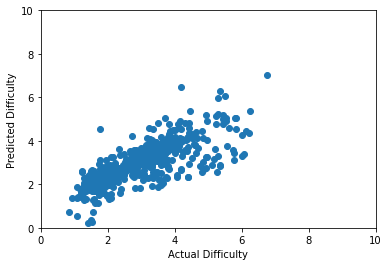

Mean squared error for polynomial regression order 1: 0.5573705436400357


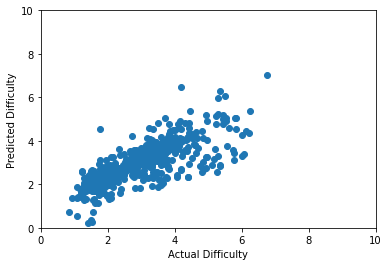

Mean squared error for polynomial regression order 2: 0.6382084873487943


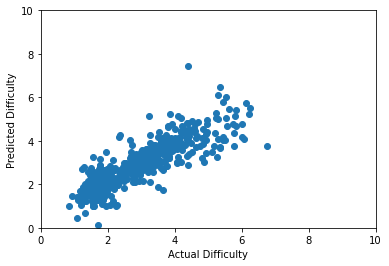

Mean squared error for polynomial regression order 3: 34041.04207277949


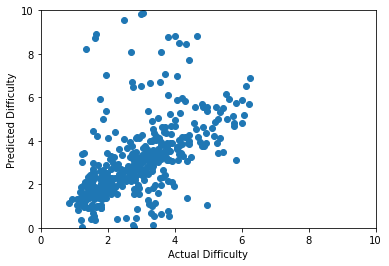

Mean squared error for polynomial regression order 4: 3491145190325.432


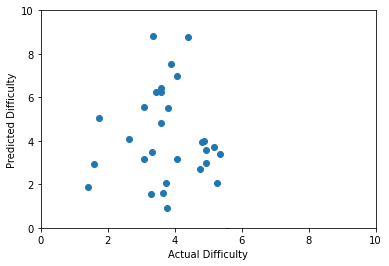

Mean squared error for polynomial regression order 5: 453965392.47428674


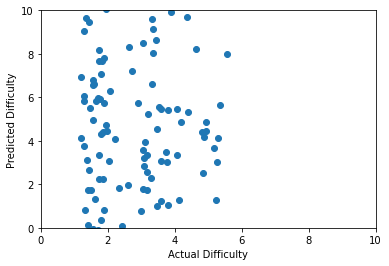

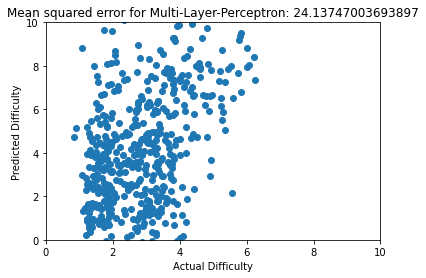

In [21]:
data_osu = pd.read_csv('output_-_1818_rows.csv') # loading dataset



data_osu=data_osu.drop('Song Title',1) \
.drop('Artist',1) \
.drop('Creator',1) \
.drop('Circle Size',1) 

X_train, X_test, y_train, y_test = train_test_split(data_osu.drop('Difficulty',1), 
                                                    data_osu['Difficulty'],
                                                    test_size=0.3,
                                                    random_state=0)
                                                    #keeping intervals chords  

run_linear_regression(X_train,X_test,y_train,y_test)
run_poly_regression(X_train,X_test,y_train,y_test)
run_mlp(X_train,X_test,y_train,y_test)

## Running Models with Set A removed from dataset

Mean squared error for linear regression: 0.5581799903281118


C:\Users\painis\AppData\Local\Temp/ipykernel_16320/1772125711.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_osu=data_osu.drop('Song Title',1) \
C:\Users\painis\AppData\Local\Temp/ipykernel_16320/1772125711.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(data_osu.drop('Difficulty',1),


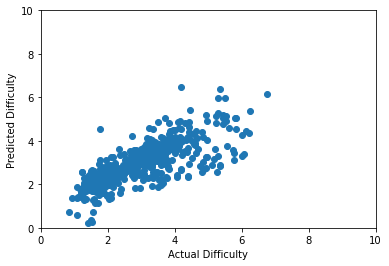

Mean squared error for polynomial regression order 1: 0.5581799903281119


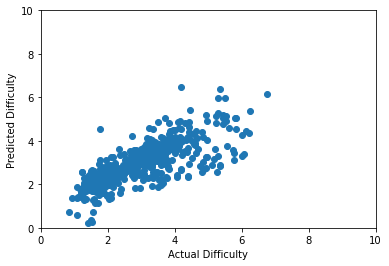

Mean squared error for polynomial regression order 2: 0.7181716845943977


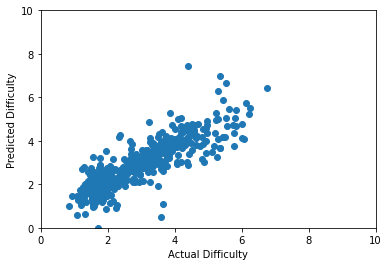

Mean squared error for polynomial regression order 3: 23695.604155882043


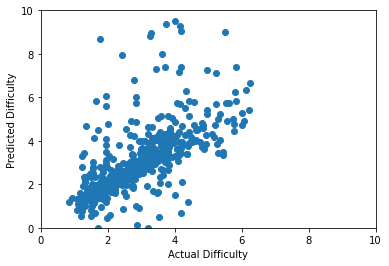

Mean squared error for polynomial regression order 4: 4301765960547.6475


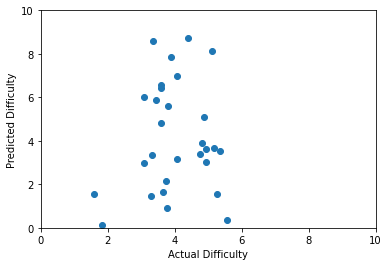

Mean squared error for polynomial regression order 5: 548439555.5616215


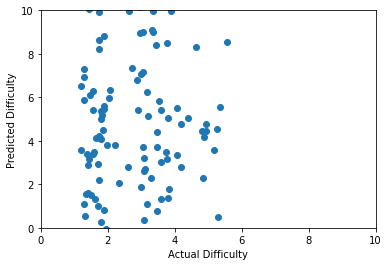

Mean squared error for Multi-Layer-Perceptron: 11.0945595596658


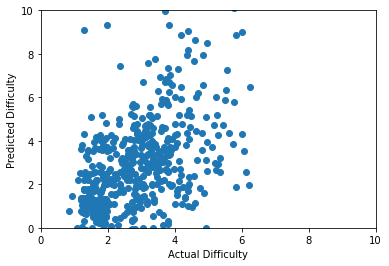

In [17]:
data_osu = pd.read_csv('output_-_1818_rows.csv') # loading dataset



data_osu=data_osu.drop('Song Title',1) \
.drop('Artist',1) \
.drop('Creator',1) \
.drop('Circle Size',1) \
.drop('Total Notes',1) 

X_train, X_test, y_train, y_test = train_test_split(data_osu.drop('Difficulty',1), 
                                                    data_osu['Difficulty'],
                                                    test_size=0.3,
                                                    random_state=0)

run_linear_regression(X_train,X_test,y_train,y_test)
run_poly_regression(X_train,X_test,y_train,y_test)
run_mlp(X_train,X_test,y_train,y_test)

## Running Models with Set B removed from dataset

Mean squared error for linear regression: 0.655107008883642


C:\Users\painis\AppData\Local\Temp/ipykernel_16320/1519695596.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_osu=data_osu.drop('Song Title',1) \
C:\Users\painis\AppData\Local\Temp/ipykernel_16320/1519695596.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(data_osu.drop('Difficulty',1),


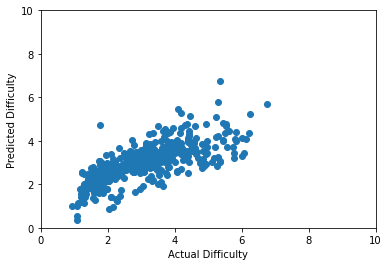

Mean squared error for polynomial regression order 1: 0.6551070088836423


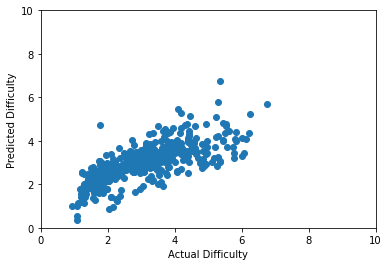

Mean squared error for polynomial regression order 2: 0.45381850322735257


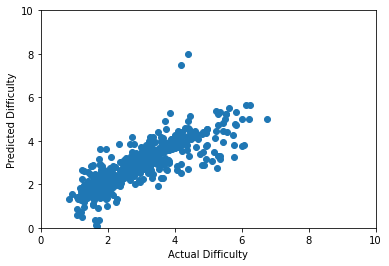

Mean squared error for polynomial regression order 3: 1.5577598694496344


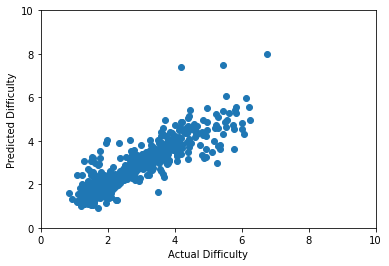

Mean squared error for polynomial regression order 4: 128.54139882849356


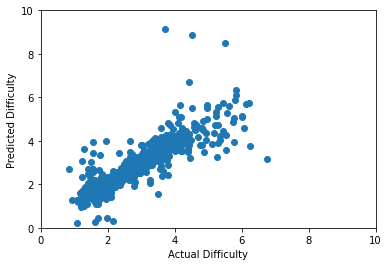

Mean squared error for polynomial regression order 5: 13008.44734011104


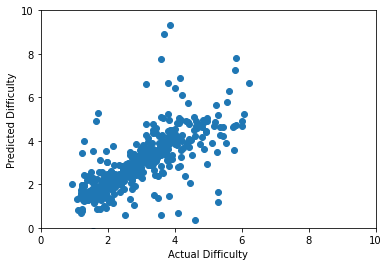

Mean squared error for Multi-Layer-Perceptron: 8.07611426168286


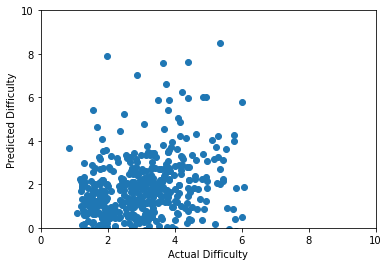

In [18]:
data_osu = pd.read_csv('output_-_1818_rows.csv') # loading dataset

data_osu=data_osu.drop('Song Title',1) \
.drop('Artist',1) \
.drop('Creator',1) \
.drop('Circle Size',1) \
.drop('Total Notes',1) \
.drop('1 Note on Drag',1) \
.drop('2 Note on Drag',1) \
.drop('3 Note on Drag',1) \
.drop('Drag on 1 Drag',1) \
.drop('Drag on 2 Drag',1) \
.drop('Drag on 3 Drag',1) \
.drop('NPM',1) 

X_train, X_test, y_train, y_test = train_test_split(data_osu.drop('Difficulty',1), 
                                                    data_osu['Difficulty'],
                                                    test_size=0.3,
                                                    random_state=0)

run_linear_regression(X_train,X_test,y_train,y_test)
run_poly_regression(X_train,X_test,y_train,y_test)
run_mlp(X_train,X_test,y_train,y_test)

## Running Models with Set C removed from dataset

Mean squared error for linear regression: 0.7154500906829278


C:\Users\painis\AppData\Local\Temp/ipykernel_16320/102445464.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_osu=data_osu.drop('Song Title',1) \
C:\Users\painis\AppData\Local\Temp/ipykernel_16320/102445464.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(data_osu.drop('Difficulty',1),


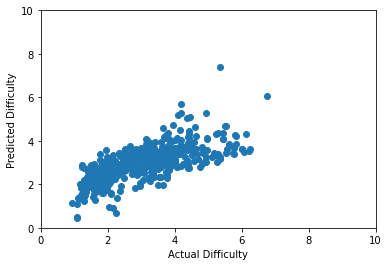

Mean squared error for polynomial regression order 1: 0.7154500906829275


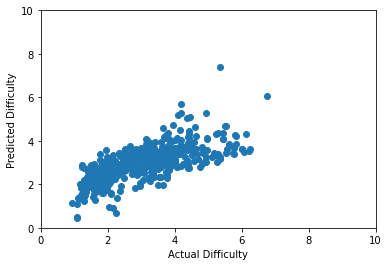

Mean squared error for polynomial regression order 2: 0.505779452205164


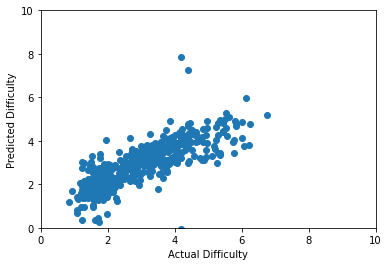

Mean squared error for polynomial regression order 3: 0.42858619866521214


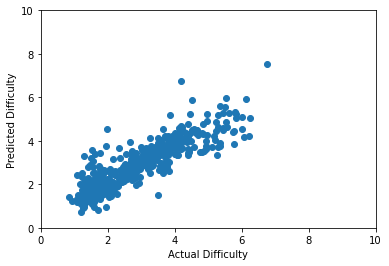

Mean squared error for polynomial regression order 4: 19.259085294529918


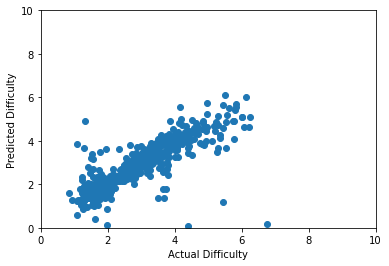

Mean squared error for polynomial regression order 5: 6273.439299005179


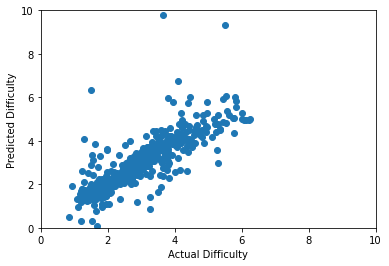

Mean squared error for Multi-Layer-Perceptron: 1.671075353746408


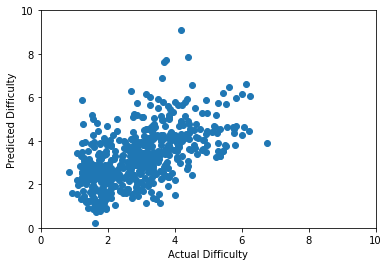

In [19]:
data_osu = pd.read_csv('output_-_1818_rows.csv') # loading dataset



data_osu=data_osu.drop('Song Title',1) \
.drop('Artist',1) \
.drop('Creator',1) \
.drop('Circle Size',1) \
.drop('Total Notes',1) \
.drop('1 Note on Drag',1) \
.drop('2 Note on Drag',1) \
.drop('3 Note on Drag',1) \
.drop('Drag on 1 Drag',1) \
.drop('Drag on 2 Drag',1) \
.drop('Drag on 3 Drag',1) \
.drop('NPM',1) \
.drop('Maximum Interval',1)

X_train, X_test, y_train, y_test = train_test_split(data_osu.drop('Difficulty',1), 
                                                    data_osu['Difficulty'],
                                                    test_size=0.3,
                                                    random_state=0)
run_linear_regression(X_train,X_test,y_train,y_test)
run_poly_regression(X_train,X_test,y_train,y_test)
run_mlp(X_train,X_test,y_train,y_test)